In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1)- Job description

In [2]:
import pandas as pd
import os

dataset = 'drive/MyDrive/ColabNotebooks/multilabel_skillset/Dataset'
job_descrip = os.path.join(dataset, 'Occupation Data.xlsx')
# Returns a dict of DataFrames in case there are many sheets in excel
df_jobs = pd.read_excel(job_descrip, sheet_name = None)['Occupation Data']

df_jobs.head()

,O*NET-SOC Code,Title,Description
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
3,11-1031.00,Legislators,"Develop, introduce or enact laws and statutes ..."
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."


In [3]:
# We have 1110 different job titles in the dataset
df_jobs['Title'].unique().tolist()

['Chief Executives',
 'Chief Sustainability Officers',
 'General and Operations Managers',
 'Legislators',
 'Advertising and Promotions Managers',
 'Green Marketers',
 'Marketing Managers',
 'Sales Managers',
 'Public Relations and Fundraising Managers',
 'Administrative Services Managers',
 'Computer and Information Systems Managers',
 'Financial Managers',
 'Treasurers and Controllers',
 'Financial Managers, Branch or Department',
 'Industrial Production Managers',
 'Quality Control Systems Managers',
 'Geothermal Production Managers',
 'Biofuels Production Managers',
 'Biomass Power Plant Managers',
 'Methane/Landfill Gas Collection System Operators',
 'Hydroelectric Production Managers',
 'Purchasing Managers',
 'Transportation, Storage, and Distribution Managers',
 'Transportation Managers',
 'Storage and Distribution Managers',
 'Logistics Managers',
 'Compensation and Benefits Managers',
 'Human Resources Managers',
 'Training and Development Managers',
 'Farmers, Ranchers, and 

# 2)- **Abilities**



In [5]:
abilities = os.path.join(dataset, 'abilities/Abilities.xlsx')
df_abilities = pd.read_excel(abilities, sheet_name = None)['Abilities']

df_abilities.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8.0,0.13,4.63,5.12,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst


In [6]:
# Check that every title has all the abilities in "Element Name"

# A list of all unique titles
title = df_abilities['Title'].unique().tolist()
# A list of all unique abilities
abitlity_list = df_abilities['Element Name'].unique().tolist()

for t in title:
  L = df_abilities[df_abilities['Title'] == t]['Element Name'].unique().tolist()
  if L != abitlity_list:
    print(t)


In [7]:
# We create a dictionnary of dataframes containing all abilities
# rated by importance, and then by level

# A list of all unique available scales
scale_id = ["IM", "LV"]

ability_dict = dict()
for ab in abitlity_list:
  for s in scale_id:
    df = df_abilities[(df_abilities['Element Name'] == ab) & (df_abilities['Scale ID'] == s)]
    ability_dict[ab +' '+ s] = df[['O*NET-SOC Code', 'Title', 'Domain Source', 'Data Value']].rename(columns={"Data Value": ab +' '+ s})

# All the dataframes in ability_dict have 968 rows, and 4 columns


In [9]:
from functools import reduce

# Here, we merge all dataframes on common attributes
all_dfs = list(ability_dict.values())
common = ['O*NET-SOC Code', 'Title', 'Domain Source']
df_final = reduce(lambda left,right: pd.merge(left, right, on=common), all_dfs)
df_final.head()

,O*NET-SOC Code,Title,Domain Source,Oral Comprehension IM,Oral Comprehension LV,Written Comprehension IM,Written Comprehension LV,Oral Expression IM,Oral Expression LV,Written Expression IM,Written Expression LV,Fluency of Ideas IM,Fluency of Ideas LV,Originality IM,Originality LV,Problem Sensitivity IM,Problem Sensitivity LV,Deductive Reasoning IM,Deductive Reasoning LV,Inductive Reasoning IM,Inductive Reasoning LV,Information Ordering IM,Information Ordering LV,Category Flexibility IM,Category Flexibility LV,Mathematical Reasoning IM,Mathematical Reasoning LV,Number Facility IM,Number Facility LV,Memorization IM,Memorization LV,Speed of Closure IM,Speed of Closure LV,Flexibility of Closure IM,Flexibility of Closure LV,Perceptual Speed IM,Perceptual Speed LV,Spatial Orientation IM,Spatial Orientation LV,Visualization IM,...,Explosive Strength IM,Explosive Strength LV,Dynamic Strength IM,Dynamic Strength LV,Trunk Strength IM,Trunk Strength LV,Stamina IM,Stamina LV,Extent Flexibility IM,Extent Flexibility LV,Dynamic Flexibility IM,Dynamic Flexibility LV,Gross Body Coordination IM,Gross Body Coordination LV,Gross Body Equilibrium IM,Gross Body Equilibrium LV,Near Vision IM,Near Vision LV,Far Vision IM,Far Vision LV,Visual Color Discrimination IM,Visual Color Discrimination LV,Night Vision IM,Night Vision LV,Peripheral Vision IM,Peripheral Vision LV,Depth Perception IM,Depth Perception LV,Glare Sensitivity IM,Glare Sensitivity LV,Hearing Sensitivity IM,Hearing Sensitivity LV,Auditory Attention IM,Auditory Attention LV,Sound Localization IM,Sound Localization LV,Speech Recognition IM,Speech Recognition LV,Speech Clarity IM,Speech Clarity LV
0,11-1011.00,Chief Executives,Analyst,4.5,4.88,4.25,4.62,4.38,5.00,4.12,4.62,3.88,4.62,3.88,4.25,4.00,5.00,4.12,5.00,4.00,5.00,3.62,4.00,3.50,4.12,3.38,3.88,3.25,4.12,3.00,3.12,3.12,3.38,3.38,3.50,3.12,2.88,1.12,0.12,3.12,...,1.0,0.00,1.00,0.00,1.00,0.00,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.88,4.50,3.00,3.12,1.88,1.62,1.00,0.0,1.0,0.00,1.75,1.50,1.00,0.00,1.75,1.50,2.12,2.12,1.00,0.00,4.12,4.62,4.12,4.88
1,11-1011.03,Chief Sustainability Officers,Analyst,4.0,4.50,4.00,4.38,4.00,4.62,3.88,4.38,3.62,4.12,3.62,4.00,3.88,4.25,4.00,4.50,4.00,4.25,3.50,3.62,3.38,3.62,2.88,3.25,2.75,3.25,2.25,2.50,2.38,2.62,3.00,3.00,2.38,2.38,1.25,0.25,2.75,...,1.0,0.00,1.00,0.00,1.12,0.25,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.38,3.50,2.62,2.75,2.00,1.62,1.00,0.0,1.0,0.00,2.00,1.88,1.00,0.00,2.00,1.50,1.88,1.62,1.12,0.12,4.00,3.62,4.00,3.62
2,11-1021.00,General and Operations Managers,Analyst,4.0,4.12,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.25,3.00,3.38,4.00,3.88,3.75,3.75,3.12,3.38,3.50,3.62,3.00,3.00,2.88,3.12,2.75,2.62,2.12,2.25,2.25,2.12,2.75,2.25,2.62,2.25,1.50,0.62,2.75,...,1.5,0.75,1.62,0.75,2.12,2.12,2.0,1.5,1.38,0.5,1.0,0.0,1.88,1.25,1.5,0.62,3.25,3.25,2.75,2.88,2.00,2.25,1.38,0.5,1.5,0.88,2.00,1.88,1.38,0.38,2.00,2.00,2.12,2.00,1.50,0.62,3.88,3.25,4.00,3.25
3,11-2011.00,Advertising and Promotions Managers,Analyst,4.0,4.38,4.00,4.00,4.25,4.75,3.88,4.00,3.75,4.12,3.75,3.88,3.62,4.00,3.88,4.50,3.50,3.88,3.25,3.75,3.38,3.88,3.00,3.12,2.88,3.12,2.50,2.38,2.62,2.75,3.12,3.12,2.88,2.75,1.00,0.00,3.25,...,1.0,0.00,1.00,0.00,1.62,0.88,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.75,4.12,2.88,3.12,2.88,2.75,1.00,0.0,1.0,0.00,1.75,1.00,1.00,0.00,1.75,1.25,1.75,1.25,1.00,0.00,3.88,4.00,4.00,3.88
4,11-2021.00,Marketing Managers,Analyst,4.0,4.38,4.00,4.12,4.00,4.12,3.88,4.12,3.75,4.25,3.62,4.00,3.62,3.88,3.88,4.38,3.75,3.88,3.25,3.50,3.25,3.62,3.12,3.62,3.12,3.50,2.62,3.00,2.75,3.00,3.00,3.00,2.75,2.88,1.00,0.00,3.00,...,1.0,0.00,1.25,0.25,1.75,0.88,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.50,3.75,2.88,3.25,2.88,2.88,1.00,0.0,1.0,0.00,1.75,0.75,1.00,0.00,1.88,1.50,1.88,1.62,1.00,0.00,3.62,3.88,3.75,3.88


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8efd9c1b38>,
      dtype=object)

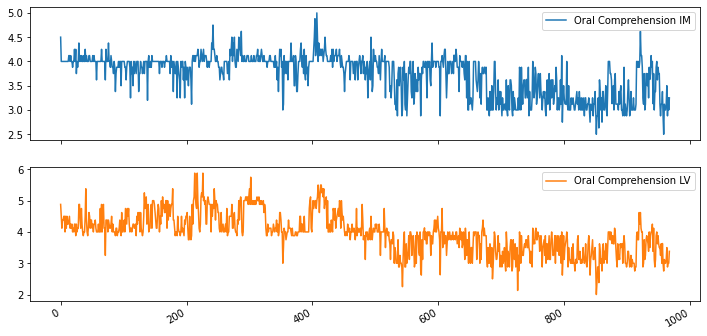

In [11]:
# Whether the scale is "Importance" or "Level", we choose one of the two to
# decide whether a particular job has the required ability or not.

%matplotlib inline
df_final[['Oral Comprehension IM', 'Oral Comprehension LV']].plot(figsize=(12,6), subplots=True)

In [12]:
# Filter on Importance scale.

filter_col = [col for col in df_final if col.endswith('IM')]
df_final_ab = df_final[['O*NET-SOC Code', 'Title'] + filter_col]
df_final_ab.head()

,O*NET-SOC Code,Title,Oral Comprehension IM,Written Comprehension IM,Oral Expression IM,Written Expression IM,Fluency of Ideas IM,Originality IM,Problem Sensitivity IM,Deductive Reasoning IM,Inductive Reasoning IM,Information Ordering IM,Category Flexibility IM,Mathematical Reasoning IM,Number Facility IM,Memorization IM,Speed of Closure IM,Flexibility of Closure IM,Perceptual Speed IM,Spatial Orientation IM,Visualization IM,Selective Attention IM,Time Sharing IM,Arm-Hand Steadiness IM,Manual Dexterity IM,Finger Dexterity IM,Control Precision IM,Multilimb Coordination IM,Response Orientation IM,Rate Control IM,Reaction Time IM,Wrist-Finger Speed IM,Speed of Limb Movement IM,Static Strength IM,Explosive Strength IM,Dynamic Strength IM,Trunk Strength IM,Stamina IM,Extent Flexibility IM,Dynamic Flexibility IM,Gross Body Coordination IM,Gross Body Equilibrium IM,Near Vision IM,Far Vision IM,Visual Color Discrimination IM,Night Vision IM,Peripheral Vision IM,Depth Perception IM,Glare Sensitivity IM,Hearing Sensitivity IM,Auditory Attention IM,Sound Localization IM,Speech Recognition IM,Speech Clarity IM
0,11-1011.00,Chief Executives,4.5,4.25,4.38,4.12,3.88,3.88,4.00,4.12,4.00,3.62,3.50,3.38,3.25,3.00,3.12,3.38,3.12,1.12,3.12,3.00,3.00,1.00,1.00,2.25,1.75,1.75,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.00,1.0,1.00,1.0,3.88,3.00,1.88,1.00,1.0,1.75,1.00,1.75,2.12,1.00,4.12,4.12
1,11-1011.03,Chief Sustainability Officers,4.0,4.00,4.00,3.88,3.62,3.62,3.88,4.00,4.00,3.50,3.38,2.88,2.75,2.25,2.38,3.00,2.38,1.25,2.75,2.88,2.62,1.00,1.00,2.25,1.75,1.62,1.12,1.12,1.25,1.12,1.0,1.0,1.0,1.00,1.12,1.0,1.00,1.0,1.00,1.0,3.38,2.62,2.00,1.00,1.0,2.00,1.00,2.00,1.88,1.12,4.00,4.00
2,11-1021.00,General and Operations Managers,4.0,4.00,4.00,4.00,3.00,3.00,4.00,3.75,3.12,3.50,3.00,2.88,2.75,2.12,2.25,2.75,2.62,1.50,2.75,3.00,2.88,2.00,1.50,1.75,1.75,1.88,1.38,1.75,2.12,1.38,1.5,2.0,1.5,1.62,2.12,2.0,1.38,1.0,1.88,1.5,3.25,2.75,2.00,1.38,1.5,2.00,1.38,2.00,2.12,1.50,3.88,4.00
3,11-2011.00,Advertising and Promotions Managers,4.0,4.00,4.25,3.88,3.75,3.75,3.62,3.88,3.50,3.25,3.38,3.00,2.88,2.50,2.62,3.12,2.88,1.00,3.25,2.88,2.75,1.38,1.38,1.62,1.12,1.00,1.00,1.00,1.00,1.75,1.0,1.0,1.0,1.00,1.62,1.0,1.00,1.0,1.00,1.0,3.75,2.88,2.88,1.00,1.0,1.75,1.00,1.75,1.75,1.00,3.88,4.00
4,11-2021.00,Marketing Managers,4.0,4.00,4.00,3.88,3.75,3.62,3.62,3.88,3.75,3.25,3.25,3.12,3.12,2.62,2.75,3.00,2.75,1.00,3.00,2.88,2.75,1.12,1.00,1.75,1.00,1.00,1.00,1.00,1.00,1.62,1.0,1.0,1.0,1.25,1.75,1.0,1.00,1.0,1.00,1.0,3.50,2.88,2.88,1.00,1.0,1.75,1.00,1.88,1.88,1.00,3.62,3.75


In [13]:
# Shape of the final abilities dataset

df_final_ab.shape

(968, 54)

# 3)- **Work context & style**






## 3.1)-   Work context

In [14]:
work_context = os.path.join(dataset, 'work/Work Context.xlsx')
df_wc = pd.read_excel(work_context, sheet_name = None)['Work Context']
df_wc.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CX,Context,NaN,3.39,25.0,0.22,2.93,3.86,N,NaN,07/2014,Incumbent
1,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),1.0,6.02,25.0,5.14,0.97,29.49,N,NaN,07/2014,Incumbent
2,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),2.0,12.40,25.0,7.33,3.39,36.32,N,NaN,07/2014,Incumbent
3,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),3.0,23.36,25.0,10.36,8.45,50.16,N,NaN,07/2014,Incumbent
4,11-1011.00,Chief Executives,4.C.1.a.2.c,Public Speaking,CXP,Context (Categories 1-5),4.0,52.55,25.0,12.13,28.87,75.14,N,NaN,07/2014,Incumbent


In [15]:
# Number of all unique work contexts
N = len(df_wc['Element Name'].unique().tolist())
print(N)

57


In [16]:
# List of all unique scale ids and scale names
scale_id = df_wc['Scale ID'].unique().tolist()
scale_name = df_wc['Scale Name'].unique().tolist()
print(scale_id)
print(scale_name)

['CX', 'CXP', 'CT', 'CTP']
['Context', 'Context (Categories 1-5)', 'Context (Categories 1-3)']


In [17]:
# Number of different job titles

len(df_wc['Title'].unique().tolist())

968

In [18]:
# Here, we check that every job title has the 57 work context

# A list of all unique titles
title = df_wc['Title'].unique().tolist()
# A list of unique work contexts
wc_list = df_wc['Element Name'].unique().tolist()

# In this loop, we filter on job titles and "context" scale, to check that
# every job title has all work contexts scaled by context metric.
for t in title:
  L = df_wc[(df_wc['Title'] == t) & (df_wc['Scale Name'] == 'Context')]['Element Name'].unique().tolist()
  if L != wc_list:
    print(t)


Mathematical Technicians


In [19]:
# We notice that the job title "Mathematical Technicians" doesn't have all work contexts.

df_wc[df_wc['Title'] == 'Mathematical Technicians'].head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
46644,15-2091.00,Mathematical Technicians,4.C.1.a.4,Contact With Others,CX,Context,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
46645,15-2091.00,Mathematical Technicians,4.C.1.b.1.f,Deal With External Customers,CX,Context,NaN,1.38,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
46646,15-2091.00,Mathematical Technicians,4.C.1.b.1.g,Coordinate or Lead Others,CX,Context,NaN,1.38,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
46647,15-2091.00,Mathematical Technicians,4.C.1.c.1,Responsible for Others' Health and Safety,CX,Context,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
46648,15-2091.00,Mathematical Technicians,4.C.1.c.2,Responsibility for Outcomes and Results,CX,Context,NaN,1.25,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst


In [20]:
# Work contexts not present for "Mathematical Technicians"

l = df_wc[df_wc['Title'] == 'Mathematical Technicians']['Element Name'].unique().tolist()
sk = [wc for wc in wc_list if wc not in l]
sk

['Public Speaking',
 'Telephone',
 'Electronic Mail',
 'Letters and Memos',
 'Face-to-Face Discussions',
 'Work With Work Group or Team',
 'Indoors, Not Environmentally Controlled',
 'Outdoors, Under Cover',
 'In an Open Vehicle or Equipment',
 'In an Enclosed Vehicle or Equipment',
 'Physical Proximity',
 'Impact of Decisions on Co-workers or Company Results',
 'Frequency of Decision Making',
 'Freedom to Make Decisions',
 'Structured versus Unstructured Work',
 'Level of Competition',
 'Time Pressure',
 'Work Schedules',
 'Duration of Typical Work Week']

In [21]:
# Here, we add all work contexts not present for "Mathematical Technicians" job.
import numpy as np

for wc in sk:
  new_row = {'Category': np.nan,
            'Data Value': 0,
            'Date': '03/2002',
            'Domain Source': 'Legacy Analyst',
            'Element ID': df_wc[df_wc['Element Name'] == wc]['Element ID'].unique()[0],
            'Element Name': wc,
            'Lower CI Bound': np.nan,
            'N': np.nan,
            'Not Relevant': np.nan,
            'O*NET-SOC Code': '15-2091.00',
            'Recommend Suppress': np.nan,
            'Scale ID': 'CX',
            'Scale Name': 'Context',
            'Standard Error': np.nan,
            'Title': 'Mathematical Technicians',
            'Upper CI Bound': np.nan}

  df_wc = df_wc.append(new_row, ignore_index=True)

In [22]:
# All added rows to the dataframe

df_wc[(df_wc['Title'] == 'Mathematical Technicians') & (df_wc['Element Name'].isin(sk))].head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
326884,15-2091.00,Mathematical Technicians,4.C.1.a.2.c,Public Speaking,CX,Context,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
326885,15-2091.00,Mathematical Technicians,4.C.1.a.2.f,Telephone,CX,Context,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
326886,15-2091.00,Mathematical Technicians,4.C.1.a.2.h,Electronic Mail,CX,Context,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
326887,15-2091.00,Mathematical Technicians,4.C.1.a.2.j,Letters and Memos,CX,Context,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
326888,15-2091.00,Mathematical Technicians,4.C.1.a.2.l,Face-to-Face Discussions,CX,Context,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst


In [23]:
# First, we check that all data values on "Context" are not empty

df_wc[df_wc['Scale Name'] == 'Context']['Data Value'].isnull().sum()

0

In [24]:
# Let's consider the scale name "Context" for this dataset,
# this includes CX and CT in scale ID.

# Just like before, we create a dictionnary of dataframes containing all work
# contexts rated by context.
wc_dict = dict()
for wc in wc_list:
  df = df_wc[(df_wc['Element Name'] == wc) & (df_wc['Scale Name'] == "Context")]
  wc_dict[wc + " CX"] = df[['O*NET-SOC Code', 'Title', 'Data Value']].rename(columns={"Data Value": wc + " CX"}).reset_index(drop=True)


In [25]:
# We merge all these dataframes on common attributes.

all_dfs = list(wc_dict.values())
common = ['O*NET-SOC Code', 'Title']
df_final_wc = reduce(lambda left,right: pd.merge(left, right, on=common), all_dfs)
df_final_wc.head()

,O*NET-SOC Code,Title,Public Speaking CX,Telephone CX,Electronic Mail CX,Letters and Memos CX,Face-to-Face Discussions CX,Contact With Others CX,Work With Work Group or Team CX,Deal With External Customers CX,Coordinate or Lead Others CX,Responsible for Others' Health and Safety CX,Responsibility for Outcomes and Results CX,Frequency of Conflict Situations CX,Deal With Unpleasant or Angry People CX,Deal With Physically Aggressive People CX,"Indoors, Environmentally Controlled CX","Indoors, Not Environmentally Controlled CX","Outdoors, Exposed to Weather CX","Outdoors, Under Cover CX",In an Open Vehicle or Equipment CX,In an Enclosed Vehicle or Equipment CX,Physical Proximity CX,"Sounds, Noise Levels Are Distracting or Uncomfortable CX",Very Hot or Cold Temperatures CX,Extremely Bright or Inadequate Lighting CX,Exposed to Contaminants CX,"Cramped Work Space, Awkward Positions CX",Exposed to Whole Body Vibration CX,Exposed to Radiation CX,Exposed to Disease or Infections CX,Exposed to High Places CX,Exposed to Hazardous Conditions CX,Exposed to Hazardous Equipment CX,"Exposed to Minor Burns, Cuts, Bites, or Stings CX",Spend Time Sitting CX,Spend Time Standing CX,"Spend Time Climbing Ladders, Scaffolds, or Poles CX",Spend Time Walking and Running CX,"Spend Time Kneeling, Crouching, Stooping, or Crawling CX",Spend Time Keeping or Regaining Balance CX,"Spend Time Using Your Hands to Handle, Control, or Feel Objects, Tools, or Controls CX",Spend Time Bending or Twisting the Body CX,Spend Time Making Repetitive Motions CX,"Wear Common Protective or Safety Equipment such as Safety Shoes, Glasses, Gloves, Hearing Protection, Hard Hats, or Life Jackets CX","Wear Specialized Protective or Safety Equipment such as Breathing Apparatus, Safety Harness, Full Protection Suits, or Radiation Protection CX",Consequence of Error CX,Impact of Decisions on Co-workers or Company Results CX,Frequency of Decision Making CX,Freedom to Make Decisions CX,Degree of Automation CX,Importance of Being Exact or Accurate CX,Importance of Repeating Same Tasks CX,Structured versus Unstructured Work CX,Level of Competition CX,Time Pressure CX,Pace Determined by Speed of Equipment CX,Work Schedules CX,Duration of Typical Work Week CX
0,11-1011.00,Chief Executives,3.39,5.00,5.00,4.33,4.98,4.80,4.74,4.33,4.69,3.80,4.45,4.06,3.57,1.86,4.90,2.26,2.21,1.65,1.60,3.04,2.73,2.94,2.03,1.88,2.30,1.45,1.61,1.06,1.72,1.48,1.65,2.16,1.49,3.83,2.34,1.24,2.14,1.43,1.34,1.86,1.48,2.19,2.01,1.35,3.45,4.87,4.91,4.91,2.68,4.16,3.23,4.98,4.18,4.20,1.66,1.30,2.89
1,11-1011.03,Chief Sustainability Officers,2.77,4.88,4.96,3.96,4.76,4.38,4.48,3.73,4.12,2.54,3.36,2.76,2.38,1.04,4.46,2.08,1.92,1.84,1.00,2.72,2.92,2.04,1.69,1.42,1.65,1.38,1.08,1.08,1.12,1.50,1.23,1.17,1.15,4.38,1.96,1.36,1.92,1.12,1.08,1.77,1.19,2.35,2.23,1.42,2.35,3.92,3.60,4.42,1.72,3.42,2.24,4.36,3.46,3.65,1.12,1.35,2.77
2,11-1021.00,General and Operations Managers,2.87,4.93,4.85,3.95,4.95,4.79,4.79,4.13,4.41,4.23,4.55,3.73,3.44,1.44,4.65,2.32,1.96,1.41,1.31,2.13,3.21,3.22,1.94,1.36,2.31,1.53,1.03,1.09,1.56,1.84,1.64,2.66,1.77,3.56,2.80,1.35,2.22,1.46,1.28,2.42,1.64,2.44,2.85,1.38,3.28,4.53,4.54,4.78,2.27,3.99,3.59,4.80,3.44,4.22,1.60,1.15,2.86
3,11-2011.00,Advertising and Promotions Managers,2.55,4.80,5.00,3.78,4.87,4.68,4.47,4.19,4.11,2.52,3.80,3.15,2.92,1.14,4.62,1.68,2.46,2.00,1.13,2.28,2.82,2.36,1.47,1.48,1.42,1.38,1.03,1.00,1.03,1.16,1.06,1.20,1.27,4.33,2.11,1.09,1.97,1.37,1.27,2.07,1.31,2.50,1.24,1.00,2.19,4.03,4.31,4.04,2.01,4.30,2.70,4.23,3.34,4.40,1.00,1.20,2.48
4,11-2021.00,Marketing Managers,3.35,4.92,5.00,3.52,4.76,4.61,4.67,4.25,4.32,2.21,4.04,3.18,2.74,1.16,4.53,1.86,1.38,1.25,1.08,2.26,2.89,2.40,1.50,1.34,1.54,1.20,1.02,1.33,1.07,1.08,1.06,1.46,1.09,4.36,2.09,1.02,1.95,1.26,1.19,2.31,1.22,2.73,1.30,1.04,2.76,4.15,4.10,4.42,2.10,3.81,2.78,4.63,3.95,4.21,1.02,1.26,2.78


In [26]:
# Shape of the final work contexts dataset

df_final_wc.shape

(968, 59)

## 3.2)-   Work Style



In [27]:
work_style = os.path.join(dataset, 'work/Work Styles.xlsx')
df_ws = pd.read_excel(work_style, sheet_name = None)['Work Styles']
df_ws.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Date,Domain Source
0,11-1011.00,Chief Executives,1.C.1.a,Achievement/Effort,IM,Importance,4.55,27,0.16,4.21,4.89,N,07/2014,Incumbent
1,11-1011.00,Chief Executives,1.C.1.b,Persistence,IM,Importance,4.43,27,0.18,4.06,4.80,N,07/2014,Incumbent
2,11-1011.00,Chief Executives,1.C.1.c,Initiative,IM,Importance,4.75,27,0.12,4.50,4.99,N,07/2014,Incumbent
3,11-1011.00,Chief Executives,1.C.2.b,Leadership,IM,Importance,4.97,27,0.03,4.90,5.00,N,07/2014,Incumbent
4,11-1011.00,Chief Executives,1.C.3.a,Cooperation,IM,Importance,4.44,27,0.14,4.16,4.73,N,07/2014,Incumbent


In [28]:
# A list of all unique work styles

df_ws['Element Name'].unique().tolist()

['Achievement/Effort',
 'Persistence',
 'Initiative',
 'Leadership',
 'Cooperation',
 'Concern for Others',
 'Social Orientation',
 'Self Control',
 'Stress Tolerance',
 'Adaptability/Flexibility',
 'Dependability',
 'Attention to Detail',
 'Integrity',
 'Independence',
 'Innovation',
 'Analytical Thinking']

In [29]:
# Number of all unique work styles
N = len(df_ws['Element Name'].unique().tolist())
print(N)

16


In [30]:
# List of all unique scale ids and scale names
scale_id = df_ws['Scale ID'].unique().tolist()
scale_name = df_ws['Scale Name'].unique().tolist()
print(scale_id)
print(scale_name)

['IM']
['Importance']


In [31]:
# Number of different job titles

len(df_ws['Title'].unique().tolist())

967

In [34]:
# Here, we check that every job title has the 16 work styles

# A list of all unique titles
title = df_ws['Title'].unique().tolist()
# A list of unique work styles
ws_list = df_ws['Element Name'].unique().tolist()

# In this loop, we filter on job titles, to check that
# every job title has all work styles.
for t in title:
  L = df_ws[df_ws['Title'] == t]['Element Name'].unique().tolist()
  if L != ws_list:
    print(t)


In [35]:
# First, we check that all data values are not empty

df_ws['Data Value'].isnull().sum()

0

In [37]:
# We create a dictionnary of dataframes containing all work
# styles rated by importance.

ws_dict = dict()
for ws in ws_list:
  df = df_ws[df_ws['Element Name'] == ws]
  ws_dict[ws + " IM"] = df[['O*NET-SOC Code', 'Title', 'Data Value']].rename(columns={"Data Value": ws + " IM"}).reset_index(drop=True)


In [38]:
# Just like before, we merge all these dataframes
# on common attributes

all_dfs = list(ws_dict.values())
common = ['O*NET-SOC Code', 'Title']
df_final_ws = reduce(lambda left,right: pd.merge(left, right, on=common), all_dfs)
df_final_ws.head()

,O*NET-SOC Code,Title,Achievement/Effort IM,Persistence IM,Initiative IM,Leadership IM,Cooperation IM,Concern for Others IM,Social Orientation IM,Self Control IM,Stress Tolerance IM,Adaptability/Flexibility IM,Dependability IM,Attention to Detail IM,Integrity IM,Independence IM,Innovation IM,Analytical Thinking IM
0,11-1011.00,Chief Executives,4.55,4.43,4.75,4.97,4.44,4.22,3.67,4.52,4.75,4.20,4.65,4.49,4.80,4.54,4.27,4.45
1,11-1011.03,Chief Sustainability Officers,4.19,4.31,4.60,4.64,4.32,3.48,3.35,4.00,4.08,4.23,4.23,4.12,4.58,4.27,4.38,4.31
2,11-1021.00,General and Operations Managers,4.18,4.04,4.35,4.59,4.16,4.06,3.57,4.31,4.33,4.09,4.54,4.25,4.30,3.99,3.65,4.03
3,11-2011.00,Advertising and Promotions Managers,4.10,4.32,4.56,4.03,4.51,3.81,3.70,4.18,4.35,4.42,4.51,4.48,4.17,4.04,3.99,3.88
4,11-2021.00,Marketing Managers,4.32,4.23,4.53,4.37,4.08,3.37,3.80,3.87,4.01,4.31,4.35,4.32,4.17,3.88,4.15,4.00


In [39]:
# Shape of the final work styles dataset

df_final_ws.shape

(967, 18)

# 4)- **Skills, Technology skills & tools used**


## 4.1)-   Skills

In [40]:
skills = os.path.join(dataset, 'skills/Skills.xlsx')
df_sk = pd.read_excel(skills, sheet_name = None)['Skills']
df_sk.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst


In [41]:
# A list of all unique skills
df_sk['Element Name'].unique().tolist()

['Reading Comprehension',
 'Active Listening',
 'Writing',
 'Speaking',
 'Mathematics',
 'Science',
 'Critical Thinking',
 'Active Learning',
 'Learning Strategies',
 'Monitoring',
 'Social Perceptiveness',
 'Coordination',
 'Persuasion',
 'Negotiation',
 'Instructing',
 'Service Orientation',
 'Complex Problem Solving',
 'Operations Analysis',
 'Technology Design',
 'Equipment Selection',
 'Installation',
 'Programming',
 'Operation Monitoring',
 'Operation and Control',
 'Equipment Maintenance',
 'Troubleshooting',
 'Repairing',
 'Quality Control Analysis',
 'Judgment and Decision Making',
 'Systems Analysis',
 'Systems Evaluation',
 'Time Management',
 'Management of Financial Resources',
 'Management of Material Resources',
 'Management of Personnel Resources']

In [42]:
# Number of all unique skills
len(df_sk['Element Name'].unique().tolist())

35

In [43]:
# Number of different job titles

len(df_sk['Title'].unique().tolist())

968

In [44]:
# Here, we check that every job title has the 35 skills

# A list of all unique titles
title = df_sk['Title'].unique().tolist()
# A list of unique skills
sk_list = df_sk['Element Name'].unique().tolist()

# In this loop, we filter on job titles and on "Importance", to check that
# every job title has all skills rated by Importance.
for t in title:
  L = df_sk[df_sk['Title'] == t]['Element Name'].unique().tolist()
  if L != sk_list:
    print(t)


In [45]:
# First, we check that all data values are not empty

df_sk['Data Value'].isnull().sum()

0

In [46]:
# We create a dictionnary of dataframes containing all skills
# rated by importance.

sk_dict = dict()
for sk in sk_list:
  df = df_sk[(df_sk['Element Name'] == sk) & (df_sk['Scale Name'] == 'Importance')]
  sk_dict[sk + " IM"] = df[['O*NET-SOC Code', 'Title', 'Data Value']].rename(columns={"Data Value": sk + " IM"}).reset_index(drop=True)


In [47]:
# Just like before, we merge all these dataframes
# on common attributes

all_dfs = list(sk_dict.values())
common = ['O*NET-SOC Code', 'Title']
df_final_sk = reduce(lambda left,right: pd.merge(left, right, on=common), all_dfs)
df_final_sk.head()

,O*NET-SOC Code,Title,Reading Comprehension IM,Active Listening IM,Writing IM,Speaking IM,Mathematics IM,Science IM,Critical Thinking IM,Active Learning IM,Learning Strategies IM,Monitoring IM,Social Perceptiveness IM,Coordination IM,Persuasion IM,Negotiation IM,Instructing IM,Service Orientation IM,Complex Problem Solving IM,Operations Analysis IM,Technology Design IM,Equipment Selection IM,Installation IM,Programming IM,Operation Monitoring IM,Operation and Control IM,Equipment Maintenance IM,Troubleshooting IM,Repairing IM,Quality Control Analysis IM,Judgment and Decision Making IM,Systems Analysis IM,Systems Evaluation IM,Time Management IM,Management of Financial Resources IM,Management of Material Resources IM,Management of Personnel Resources IM
0,11-1011.00,Chief Executives,4.12,4.12,4.00,4.38,3.25,1.88,4.38,4.00,3.12,4.12,4.25,4.25,4.12,4.12,3.12,3.12,4.38,3.12,1.75,1.12,1.0,1.62,1.88,1.75,1.0,1.00,1.0,1.75,4.50,4.12,4.12,4.00,4.12,3.88,4.25
1,11-1011.03,Chief Sustainability Officers,4.00,3.88,3.88,4.00,2.75,1.75,4.00,3.50,3.38,3.62,3.75,3.62,3.62,2.88,3.25,3.25,4.00,2.62,1.62,1.12,1.0,1.62,2.25,1.62,1.0,1.12,1.0,2.25,3.75,3.62,3.62,3.38,2.62,2.38,3.38
2,11-1021.00,General and Operations Managers,3.88,4.00,3.25,4.00,2.38,1.88,3.88,3.50,3.00,4.00,4.00,4.00,3.38,3.62,3.12,3.25,3.50,2.75,1.88,1.00,1.0,1.50,2.75,2.00,1.0,2.00,1.0,2.38,3.50,3.00,3.00,3.75,3.12,3.25,3.50
3,11-2011.00,Advertising and Promotions Managers,3.75,4.12,3.75,4.00,3.00,1.62,4.00,3.25,3.00,3.25,4.00,3.50,3.38,3.12,2.88,3.12,3.50,2.75,1.75,1.12,1.0,1.75,1.62,1.00,1.0,1.00,1.0,1.62,3.75,3.12,3.12,3.50,2.75,2.62,3.12
4,11-2021.00,Marketing Managers,3.88,3.88,3.25,3.88,2.75,1.75,3.88,3.88,3.12,3.75,3.88,3.50,3.75,3.62,3.00,3.12,3.62,3.38,1.75,1.00,1.0,1.88,1.75,1.00,1.0,1.00,1.0,1.88,3.75,3.25,3.50,3.50,2.88,2.62,3.38


In [48]:
# Shape of the final skills dataset

df_final_sk.shape

(968, 37)

## 4.2)-  Technology Skills

In [50]:
tech_skills = os.path.join(dataset, 'skills/Technology Skills.xlsx')
df_techsk = pd.read_excel(tech_skills, sheet_name = None)['Technology Skills']
df_techsk.head()

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
0,11-1011.00,Chief Executives,Adobe Systems Adobe Acrobat,43232202,Document management software,Y
1,11-1011.00,Chief Executives,AdSense Tracker,43232306,Data base user interface and query software,N
2,11-1011.00,Chief Executives,Atlassian JIRA,43232201,Content workflow software,Y
3,11-1011.00,Chief Executives,Blackbaud The Raiser's Edge,43232303,Customer relationship management CRM software,N
4,11-1011.00,Chief Executives,ComputerEase Construction Accounting,43231601,Accounting software,N


In [51]:
# Number of different job titles

len(df_techsk['Title'].unique().tolist())

974

In [52]:
# Here, I used "Commodity Title" column as label instead of "Example"
# column, since "Example" contains 8814 different tech skills and will 
# result in huge sparse matrix.

# A list of all unique tech tools categories

df_techsk['Commodity Title'].unique().tolist()

['Document management software',
 'Data base user interface and query software',
 'Content workflow software',
 'Customer relationship management CRM software',
 'Accounting software',
 'Data base reporting software',
 'Electronic mail software',
 'Enterprise resource planning ERP software',
 'Time accounting software',
 'Enterprise application integration software',
 'Graphics or photo imaging software',
 'Human resources software',
 'Project management software',
 'Analytical or scientific software',
 'Spreadsheet software',
 'Financial analysis software',
 'Office suite software',
 'Presentation software',
 'Desktop publishing software',
 'Word processing software',
 'Web platform development software',
 'Data base management system software',
 'Internet browser software',
 'Calendar and scheduling software',
 'Video conferencing software',
 'Video creation and editing software',
 'Operating system software',
 'Computer aided design CAD software',
 'Metadata management software',
 '

In [53]:
# Number of all unique tech skills categories

len(df_techsk['Commodity Title'].unique().tolist())

127

In [54]:
# We group all tech skills categories by Job title
df_techsk = df_techsk.groupby(['O*NET-SOC Code', 'Title'])['Commodity Title'].apply(set).reset_index()
# We take 'Commodity Title' column elements back to a list
df_techsk['Commodity Title'] = df_techsk['Commodity Title'].apply(list)

df_techsk.head()

,O*NET-SOC Code,Title,Commodity Title
0,11-1011.00,Chief Executives,"[Electronic mail software, Internet browser so..."
1,11-1011.03,Chief Sustainability Officers,"[Office suite software, Electronic mail softwa..."
2,11-1021.00,General and Operations Managers,"[Map creation software, Electronic mail softwa..."
3,11-1031.00,Legislators,"[Office suite software, Map creation software,..."
4,11-2011.00,Advertising and Promotions Managers,"[Electronic mail software, Internet browser so..."


In [55]:
# One-hot encoding "Commodity Title" feature for the model training.

df = df_techsk['Commodity Title'].explode()
df_final_tsk = df_techsk[['O*NET-SOC Code', 'Title']].join(pd.crosstab(df.index, df))

df_final_tsk.head()

,O*NET-SOC Code,Title,Access software,Accounting software,Action games,Administration software,Analytical or scientific software,Application server software,Audit software,Authentication server software,Aviation ground support software,Backup or archival software,Bar coding software,Bridge software,Business intelligence and data analysis software,Calendar and scheduling software,Categorization or classification software,Charting software,Clustering software,Communications server software,Compiler and decompiler software,Compliance software,Computer aided design CAD and computer aided manufacturing CAM system,Computer aided design CAD software,Computer aided manufacturing CAM software,Computer based training software,Configuration management software,Contact center software,Content workflow software,Customer relationship management CRM software,Data base management system software,Data base reporting software,Data base user interface and query software,Data compression software,Data conversion software,Data mining software,Desktop communications software,Desktop publishing software,Development environment software,Device drivers or system software,...,Network security and virtual private network VPN equipment software,Network security or virtual private network VPN management software,Object or component oriented development software,Object oriented data base management software,Office suite software,Operating system software,Optical character reader OCR or scanning software,Optical network management software,Pattern design software,Platform interconnectivity software,Point of sale POS software,Portal server software,Presentation software,Printer driver software,Procedure management software,Procurement software,Program testing software,Project management software,Requirements analysis and system architecture software,Route navigation software,Sales and marketing software,Spell checkers,Spreadsheet software,Storage media loading software,Storage networking software,Switch or router software,Tax preparation software,Text to speech conversion software,Time accounting software,Transaction security and virus protection software,Transaction server software,Video conferencing software,Video creation and editing software,Voice recognition software,Voice synthesizer and recognition software,WAN switching software and firmware,Web page creation and editing software,Web platform development software,Wireless software,Word processing software
0,11-1011.00,Chief Executives,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,11-1011.03,Chief Sustainability Officers,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,11-1021.00,General and Operations Managers,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,...,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1
3,11-1031.00,Legislators,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,11-2011.00,Advertising and Promotions Managers,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1


In [56]:
# Shape of the final Technology skills dataset

df_final_tsk.shape

(974, 129)

## 4.3)-   Tools used

In [57]:
tools_used = os.path.join(dataset, 'skills/Tools Used.xlsx')
df_tools = pd.read_excel(tools_used, sheet_name = None)['Tools Used']
df_tools.head()

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title
0,11-1011.00,Chief Executives,10-key calculators,44101809,Desktop calculator
1,11-1011.00,Chief Executives,Desktop computers,43211507,Desktop computers
2,11-1011.00,Chief Executives,Laptop computers,43211503,Notebook computers
3,11-1011.00,Chief Executives,Personal computers,43211508,Personal computers
4,11-1011.00,Chief Executives,Personal digital assistants PDA,43211504,Personal digital assistant PDAs or organizers


In [58]:
# Again, we use "Commodity Title" to avoid Sparsity

# A list of all unique tech tools categories
df_tools['Commodity Title'].unique().tolist()

['Desktop calculator',
 'Desktop computers',
 'Notebook computers',
 'Personal computers',
 'Personal digital assistant PDAs or organizers',
 'Mobile phones',
 'High capacity removable media drives',
 'Scanners',
 'Portable data input terminals',
 'Special purpose telephones',
 'Photocopiers',
 'Videoconferencing systems',
 'Magnetic stripe readers and encoders',
 'Digital cameras',
 'Hand trucks or accessories',
 'Temperature and humidity walk in environmental chamber',
 'Point of sale POS terminal',
 'Surface testers',
 'Spectrometers',
 'Security cameras',
 'High vacuum equipment',
 'Laser printers',
 'Tablet computers',
 'Laser fax machine',
 'Access servers',
 'Computer servers',
 'Computer tool kits',
 'Peripheral controller cards',
 'Inkjet printers',
 'Mainframe computers',
 'Network analyzers',
 'Network interface cards',
 'Network routers',
 'Network switches',
 'Print servers',
 'Punches or nail sets or drifts',
 'Integrated services digital network ISDN access devices',
 'S

In [59]:
# Number of all unique Tools categories

len(df_tools['Commodity Title'].unique().tolist())

4180

In [60]:
# We group all tools categories by Job title
df_tools = df_tools.groupby(['O*NET-SOC Code', 'Title'])['Commodity Title'].apply(set).reset_index()
# We take 'Commodity Title' column elements back to a list
df_tools['Commodity Title'] = df_tools['Commodity Title'].apply(list)

df_tools.head()

,O*NET-SOC Code,Title,Commodity Title
0,11-1011.00,Chief Executives,[Personal digital assistant PDAs or organizers...
1,11-1011.03,Chief Sustainability Officers,"[Scanners, Notebook computers, Desktop compute..."
2,11-1021.00,General and Operations Managers,"[Digital cameras, Personal computers, Scanners..."
3,11-1031.00,Legislators,"[Tablet computers, Laser printers, Notebook co..."
4,11-2011.00,Advertising and Promotions Managers,"[Scanners, Personal digital assistant PDAs or ..."


In [61]:
# One-hot encoding "Commodity Title" feature for the model training.
df1 = df_tools['Commodity Title'].explode()
df_final_tools = df_tools[['O*NET-SOC Code', 'Title']].join(pd.crosstab(df1.index, df1))

df_final_tools.head()

,O*NET-SOC Code,Title,Abdominal binders,Abdominal retractors,Abrasion testers,Abrasive cloth,Abrasive discs,Abrasive drums,Abrasive polishers,Abrasive stones,Absorbent booms,Absorbent pillows,Accelerometers,Access servers,Accessories for stringed instruments,Accordions,Accounting machines,Acoustic sensors,Acoustic testing rooms,Acupuncture magnet pellet or seed,Acupuncture needle,Acute care fetal or maternal monitoring units or accessories,Adaptive communication switches for the physically challenged,Addressing machines,Adhesive or glue application systems,Adhesive rollers,Adjustable angle plate,Adjustable forks,Adjustable widemouth pliers,Adjustable wrenches,Adult or pediatric intensive care ventilators,Aerial cameras,Aerial working platform truck,Aerospace cockpit display panels,Aerospace head up display HUDs,Ageing ovens,Aggregate spreaders,Agricultural helicopters,Agricultural rollers,Agricultural tractors,...,Wire or cable cutter,Wire rope,Wire scissors,Wire twister,Wire wrapping tool,Wire-stripping pliers,Wireless microphone and instrument amplification system,Wireless network interface cards,Wireline grabs,Womens athletic footwear,Wood auger bit,Wood burning tools,Wood chisels,Wood easels,Wood gouge,Wood mannequins,Woodworking jointer,Wool comb,Word processors,Work benches,Work tables or stations or accessories for rehabilitation or therapy,Workshop cranes,Wrapping machinery,Wrecking or crow bar,Wrench accessories and supplies,Wrist exercisers for rehabilitation or therapy,Writing aids for the physically challenged,X ray and fluoroscopy RF radiotherapy planning simulators,X ray baggage inspection system,X ray bone densitometers,X ray diffraction equipment,X ray generators,X ray radiography examination equipment,Xenon lamp,Xylophones,Yarn assembly winder,Zither,pH electrodes,pH meters,pH test strips or papers
0,11-1011.00,Chief Executives,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11-1011.03,Chief Sustainability Officers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11-1021.00,General and Operations Managers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11-1031.00,Legislators,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11-2011.00,Advertising and Promotions Managers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
df_final_tools.shape

(974, 4182)



# 5)- **Merging all the datasets together**



In [63]:
continious_list = [df_final_ab, df_final_wc, df_final_ws, df_final_sk]
categ_list = [df_final_tsk, df_final_tools]

In [64]:
for df in continious_list+categ_list:
  print(df.shape)

(968, 54)
(968, 59)
(967, 18)
(968, 37)
(974, 129)
(974, 4182)


## 5.1)-   Continious label columns

In [65]:
# Merging Dataframes containing continious values together, in
# order to One-hot encode them first.
common = ['O*NET-SOC Code', 'Title']
df_continious = reduce(lambda left,right: pd.merge(left, right, on=common), continious_list)
df_continious.head()

,O*NET-SOC Code,Title,Oral Comprehension IM,Written Comprehension IM,Oral Expression IM,Written Expression IM,Fluency of Ideas IM,Originality IM,Problem Sensitivity IM,Deductive Reasoning IM,Inductive Reasoning IM,Information Ordering IM,Category Flexibility IM,Mathematical Reasoning IM,Number Facility IM,Memorization IM,Speed of Closure IM,Flexibility of Closure IM,Perceptual Speed IM,Spatial Orientation IM,Visualization IM,Selective Attention IM,Time Sharing IM,Arm-Hand Steadiness IM,Manual Dexterity IM,Finger Dexterity IM,Control Precision IM,Multilimb Coordination IM,Response Orientation IM,Rate Control IM,Reaction Time IM,Wrist-Finger Speed IM,Speed of Limb Movement IM,Static Strength IM,Explosive Strength IM,Dynamic Strength IM,Trunk Strength IM,Stamina IM,Extent Flexibility IM,Dynamic Flexibility IM,...,Attention to Detail IM,Integrity IM,Independence IM,Innovation IM,Analytical Thinking IM,Reading Comprehension IM,Active Listening IM,Writing IM,Speaking IM,Mathematics IM,Science IM,Critical Thinking IM,Active Learning IM,Learning Strategies IM,Monitoring IM,Social Perceptiveness IM,Coordination IM,Persuasion IM,Negotiation IM,Instructing IM,Service Orientation IM,Complex Problem Solving IM,Operations Analysis IM,Technology Design IM,Equipment Selection IM,Installation IM,Programming IM,Operation Monitoring IM,Operation and Control IM,Equipment Maintenance IM,Troubleshooting IM,Repairing IM,Quality Control Analysis IM,Judgment and Decision Making IM,Systems Analysis IM,Systems Evaluation IM,Time Management IM,Management of Financial Resources IM,Management of Material Resources IM,Management of Personnel Resources IM
0,11-1011.00,Chief Executives,4.5,4.25,4.38,4.12,3.88,3.88,4.00,4.12,4.00,3.62,3.50,3.38,3.25,3.00,3.12,3.38,3.12,1.12,3.12,3.00,3.00,1.00,1.00,2.25,1.75,1.75,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.00,1.0,...,4.49,4.80,4.54,4.27,4.45,4.12,4.12,4.00,4.38,3.25,1.88,4.38,4.00,3.12,4.12,4.25,4.25,4.12,4.12,3.12,3.12,4.38,3.12,1.75,1.12,1.0,1.62,1.88,1.75,1.0,1.00,1.0,1.75,4.50,4.12,4.12,4.00,4.12,3.88,4.25
1,11-1011.03,Chief Sustainability Officers,4.0,4.00,4.00,3.88,3.62,3.62,3.88,4.00,4.00,3.50,3.38,2.88,2.75,2.25,2.38,3.00,2.38,1.25,2.75,2.88,2.62,1.00,1.00,2.25,1.75,1.62,1.12,1.12,1.25,1.12,1.0,1.0,1.0,1.00,1.12,1.0,1.00,1.0,...,4.12,4.58,4.27,4.38,4.31,4.00,3.88,3.88,4.00,2.75,1.75,4.00,3.50,3.38,3.62,3.75,3.62,3.62,2.88,3.25,3.25,4.00,2.62,1.62,1.12,1.0,1.62,2.25,1.62,1.0,1.12,1.0,2.25,3.75,3.62,3.62,3.38,2.62,2.38,3.38
2,11-1021.00,General and Operations Managers,4.0,4.00,4.00,4.00,3.00,3.00,4.00,3.75,3.12,3.50,3.00,2.88,2.75,2.12,2.25,2.75,2.62,1.50,2.75,3.00,2.88,2.00,1.50,1.75,1.75,1.88,1.38,1.75,2.12,1.38,1.5,2.0,1.5,1.62,2.12,2.0,1.38,1.0,...,4.25,4.30,3.99,3.65,4.03,3.88,4.00,3.25,4.00,2.38,1.88,3.88,3.50,3.00,4.00,4.00,4.00,3.38,3.62,3.12,3.25,3.50,2.75,1.88,1.00,1.0,1.50,2.75,2.00,1.0,2.00,1.0,2.38,3.50,3.00,3.00,3.75,3.12,3.25,3.50
3,11-2011.00,Advertising and Promotions Managers,4.0,4.00,4.25,3.88,3.75,3.75,3.62,3.88,3.50,3.25,3.38,3.00,2.88,2.50,2.62,3.12,2.88,1.00,3.25,2.88,2.75,1.38,1.38,1.62,1.12,1.00,1.00,1.00,1.00,1.75,1.0,1.0,1.0,1.00,1.62,1.0,1.00,1.0,...,4.48,4.17,4.04,3.99,3.88,3.75,4.12,3.75,4.00,3.00,1.62,4.00,3.25,3.00,3.25,4.00,3.50,3.38,3.12,2.88,3.12,3.50,2.75,1.75,1.12,1.0,1.75,1.62,1.00,1.0,1.00,1.0,1.62,3.75,3.12,3.12,3.50,2.75,2.62,3.12
4,11-2021.00,Marketing Managers,4.0,4.00,4.00,3.88,3.75,3.62,3.62,3.88,3.75,3.25,3.25,3.12,3.12,2.62,2.75,3.00,2.75,1.00,3.00,2.88,2.75,1.12,1.00,1.75,1.00,1.00,1.00,1.00,1.00,1.62,1.0,1.0,1.0,1.25,1.75,1.0,1.00,1.0,...,4.32,4.17,3.88,4.15,4.00,3.88,3.88,3.25,3.88,2.75,1.75,3.88,3.88,3.12,3.75,3.88,3.50,3.75,3.62,3.00,3.12,3.62,3.38,1.75,1.00,1.0,1.88,1.75,1.00,1.0,1.00,1.0,1.88,3.75,3.25,3.50,3.50,2.88,2.62,3.38


In [66]:
# In this cell, we perform Spearman correlation index between the different
# label columns in order to reduce the Label space dimensionality. We find
# that there's about 52 correlated columns that we eliminate.

import numpy as np

# Create correlation matrix
corr_mat = df_continious.corr(method="spearman").abs()

# Select upper triangle of correlation matrix
sup = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

# Find labels having a correlation greater or equal to 0.85 (Strong correlation).
to_drop = [column for column in sup.columns if any(sup[column] >= 0.85)]

# Drop correlated labels 
df_continious.drop(to_drop, axis=1, inplace=True)
df_continious.head()

,O*NET-SOC Code,Title,Oral Comprehension IM,Written Comprehension IM,Fluency of Ideas IM,Problem Sensitivity IM,Deductive Reasoning IM,Information Ordering IM,Category Flexibility IM,Mathematical Reasoning IM,Memorization IM,Speed of Closure IM,Flexibility of Closure IM,Perceptual Speed IM,Spatial Orientation IM,Visualization IM,Selective Attention IM,Time Sharing IM,Arm-Hand Steadiness IM,Wrist-Finger Speed IM,Speed of Limb Movement IM,Explosive Strength IM,Dynamic Flexibility IM,Near Vision IM,Far Vision IM,Visual Color Discrimination IM,Hearing Sensitivity IM,Auditory Attention IM,Speech Recognition IM,Public Speaking CX,Telephone CX,Electronic Mail CX,Letters and Memos CX,Face-to-Face Discussions CX,Contact With Others CX,Work With Work Group or Team CX,Deal With External Customers CX,Coordinate or Lead Others CX,Responsible for Others' Health and Safety CX,Responsibility for Outcomes and Results CX,...,Importance of Being Exact or Accurate CX,Importance of Repeating Same Tasks CX,Structured versus Unstructured Work CX,Level of Competition CX,Time Pressure CX,Pace Determined by Speed of Equipment CX,Work Schedules CX,Duration of Typical Work Week CX,Achievement/Effort IM,Persistence IM,Initiative IM,Leadership IM,Cooperation IM,Concern for Others IM,Social Orientation IM,Self Control IM,Stress Tolerance IM,Adaptability/Flexibility IM,Dependability IM,Attention to Detail IM,Integrity IM,Independence IM,Innovation IM,Analytical Thinking IM,Science IM,Monitoring IM,Social Perceptiveness IM,Coordination IM,Persuasion IM,Service Orientation IM,Operations Analysis IM,Technology Design IM,Equipment Selection IM,Installation IM,Programming IM,Operation Monitoring IM,Time Management IM,Management of Financial Resources IM,Management of Material Resources IM,Management of Personnel Resources IM
0,11-1011.00,Chief Executives,4.5,4.25,3.88,4.00,4.12,3.62,3.50,3.38,3.00,3.12,3.38,3.12,1.12,3.12,3.00,3.00,1.00,1.00,1.0,1.0,1.0,3.88,3.00,1.88,1.75,2.12,4.12,3.39,5.00,5.00,4.33,4.98,4.80,4.74,4.33,4.69,3.80,4.45,...,4.16,3.23,4.98,4.18,4.20,1.66,1.30,2.89,4.55,4.43,4.75,4.97,4.44,4.22,3.67,4.52,4.75,4.20,4.65,4.49,4.80,4.54,4.27,4.45,1.88,4.12,4.25,4.25,4.12,3.12,3.12,1.75,1.12,1.0,1.62,1.88,4.00,4.12,3.88,4.25
1,11-1011.03,Chief Sustainability Officers,4.0,4.00,3.62,3.88,4.00,3.50,3.38,2.88,2.25,2.38,3.00,2.38,1.25,2.75,2.88,2.62,1.00,1.12,1.0,1.0,1.0,3.38,2.62,2.00,2.00,1.88,4.00,2.77,4.88,4.96,3.96,4.76,4.38,4.48,3.73,4.12,2.54,3.36,...,3.42,2.24,4.36,3.46,3.65,1.12,1.35,2.77,4.19,4.31,4.60,4.64,4.32,3.48,3.35,4.00,4.08,4.23,4.23,4.12,4.58,4.27,4.38,4.31,1.75,3.62,3.75,3.62,3.62,3.25,2.62,1.62,1.12,1.0,1.62,2.25,3.38,2.62,2.38,3.38
2,11-1021.00,General and Operations Managers,4.0,4.00,3.00,4.00,3.75,3.50,3.00,2.88,2.12,2.25,2.75,2.62,1.50,2.75,3.00,2.88,2.00,1.38,1.5,1.5,1.0,3.25,2.75,2.00,2.00,2.12,3.88,2.87,4.93,4.85,3.95,4.95,4.79,4.79,4.13,4.41,4.23,4.55,...,3.99,3.59,4.80,3.44,4.22,1.60,1.15,2.86,4.18,4.04,4.35,4.59,4.16,4.06,3.57,4.31,4.33,4.09,4.54,4.25,4.30,3.99,3.65,4.03,1.88,4.00,4.00,4.00,3.38,3.25,2.75,1.88,1.00,1.0,1.50,2.75,3.75,3.12,3.25,3.50
3,11-2011.00,Advertising and Promotions Managers,4.0,4.00,3.75,3.62,3.88,3.25,3.38,3.00,2.50,2.62,3.12,2.88,1.00,3.25,2.88,2.75,1.38,1.75,1.0,1.0,1.0,3.75,2.88,2.88,1.75,1.75,3.88,2.55,4.80,5.00,3.78,4.87,4.68,4.47,4.19,4.11,2.52,3.80,...,4.30,2.70,4.23,3.34,4.40,1.00,1.20,2.48,4.10,4.32,4.56,4.03,4.51,3.81,3.70,4.18,4.35,4.42,4.51,4.48,4.17,4.04,3.99,3.88,1.62,3.25,4.00,3.50,3.38,3.12,2.75,1.75,1.12,1.0,1.75,1.62,3.50,2.75,2.62,3.12
4,11-2021.00,Marketing Managers,4.0,4.00,3.75,3.62,3.88,3.25,3.25,3.12,2.62,2.75,3.00,2.75,1.00,3.00,2.88,2.75,1.12,1.62,1.0,1.0,1.0,3.50,2.88,2.88,1.88,1.88,3.62,3.35,4.92,5.00,3.52,4.76,4.61,4.67,4.25,4.32,2.21,4.04,...,3.81,2.78,4.63,3.95,4.21,1.02,1.26,2.78,4.32,4.23,4.53,4.37,4.08,3.37,3.80,3.87,4.01,4.31,4.35,4.32,4.17,3.88,4.15,4.00,1.75,3.75,3.88,3.50,3.75,3.12,3.38,1.75,1.00,1.0,1.88,1.75,3.50,2.88,2.62,3.38


In [67]:
# Shape of df_continious

df_continious.shape

(967, 110)

In [68]:
# Since we do a classification task, we need to categorize the continious 
# label columns. We loop through all columns of df_continious, and for each
# column, we compute the median. If the sample is greater or equal to the median,
# we put 1, otherwise 0.

for col in df_continious:
  if col not in ['O*NET-SOC Code', 'Title']:
    med = df_continious[col].median()
    df_continious[col] = (df_continious[col] >= med).astype(int)

df_continious.head()

,O*NET-SOC Code,Title,Oral Comprehension IM,Written Comprehension IM,Fluency of Ideas IM,Problem Sensitivity IM,Deductive Reasoning IM,Information Ordering IM,Category Flexibility IM,Mathematical Reasoning IM,Memorization IM,Speed of Closure IM,Flexibility of Closure IM,Perceptual Speed IM,Spatial Orientation IM,Visualization IM,Selective Attention IM,Time Sharing IM,Arm-Hand Steadiness IM,Wrist-Finger Speed IM,Speed of Limb Movement IM,Explosive Strength IM,Dynamic Flexibility IM,Near Vision IM,Far Vision IM,Visual Color Discrimination IM,Hearing Sensitivity IM,Auditory Attention IM,Speech Recognition IM,Public Speaking CX,Telephone CX,Electronic Mail CX,Letters and Memos CX,Face-to-Face Discussions CX,Contact With Others CX,Work With Work Group or Team CX,Deal With External Customers CX,Coordinate or Lead Others CX,Responsible for Others' Health and Safety CX,Responsibility for Outcomes and Results CX,...,Importance of Being Exact or Accurate CX,Importance of Repeating Same Tasks CX,Structured versus Unstructured Work CX,Level of Competition CX,Time Pressure CX,Pace Determined by Speed of Equipment CX,Work Schedules CX,Duration of Typical Work Week CX,Achievement/Effort IM,Persistence IM,Initiative IM,Leadership IM,Cooperation IM,Concern for Others IM,Social Orientation IM,Self Control IM,Stress Tolerance IM,Adaptability/Flexibility IM,Dependability IM,Attention to Detail IM,Integrity IM,Independence IM,Innovation IM,Analytical Thinking IM,Science IM,Monitoring IM,Social Perceptiveness IM,Coordination IM,Persuasion IM,Service Orientation IM,Operations Analysis IM,Technology Design IM,Equipment Selection IM,Installation IM,Programming IM,Operation Monitoring IM,Time Management IM,Management of Financial Resources IM,Management of Material Resources IM,Management of Personnel Resources IM
0,11-1011.00,Chief Executives,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1
1,11-1011.03,Chief Sustainability Officers,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,...,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1
2,11-1021.00,General and Operations Managers,1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
3,11-2011.00,Advertising and Promotions Managers,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1
4,11-2021.00,Marketing Managers,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1


## 5.2)-   Categorical label columns

In [69]:
# Merging Dataframes containing continious values together, in
# order to One-hot encode them first.
common = ['O*NET-SOC Code', 'Title']
df_categorical = reduce(lambda left,right: pd.merge(left, right, on=common), categ_list)
df_categorical.head()

,O*NET-SOC Code,Title,Access software,Accounting software,Action games,Administration software,Analytical or scientific software,Application server software,Audit software,Authentication server software,Aviation ground support software,Backup or archival software,Bar coding software,Bridge software,Business intelligence and data analysis software,Calendar and scheduling software,Categorization or classification software,Charting software,Clustering software,Communications server software,Compiler and decompiler software,Compliance software,Computer aided design CAD and computer aided manufacturing CAM system,Computer aided design CAD software,Computer aided manufacturing CAM software,Computer based training software,Configuration management software,Contact center software,Content workflow software,Customer relationship management CRM software,Data base management system software,Data base reporting software,Data base user interface and query software,Data compression software,Data conversion software,Data mining software,Desktop communications software,Desktop publishing software,Development environment software,Device drivers or system software,...,Wire or cable cutter,Wire rope,Wire scissors,Wire twister,Wire wrapping tool,Wire-stripping pliers,Wireless microphone and instrument amplification system,Wireless network interface cards,Wireline grabs,Womens athletic footwear,Wood auger bit,Wood burning tools,Wood chisels,Wood easels,Wood gouge,Wood mannequins,Woodworking jointer,Wool comb,Word processors,Work benches,Work tables or stations or accessories for rehabilitation or therapy,Workshop cranes,Wrapping machinery,Wrecking or crow bar,Wrench accessories and supplies,Wrist exercisers for rehabilitation or therapy,Writing aids for the physically challenged,X ray and fluoroscopy RF radiotherapy planning simulators,X ray baggage inspection system,X ray bone densitometers,X ray diffraction equipment,X ray generators,X ray radiography examination equipment,Xenon lamp,Xylophones,Yarn assembly winder,Zither,pH electrodes,pH meters,pH test strips or papers
0,11-1011.00,Chief Executives,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11-1011.03,Chief Sustainability Officers,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11-1021.00,General and Operations Managers,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11-1031.00,Legislators,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11-2011.00,Advertising and Promotions Managers,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
# Here, we consider only labels occuring more than nlim times in the dataset

import matplotlib.pyplot as plt

nlim = 250

# List of column labels with more than nlim occurences. 
L = [col for col in df_categorical if col not in ['O*NET-SOC Code', 'Title'] and df_categorical[col].sum() >= nlim]

# List of column labels with less than nlim occurences (to eliminate).
T = [col for col in df_categorical if col not in ['O*NET-SOC Code', 'Title'] and df_categorical[col].sum() < nlim]


In [105]:
# Categorical label space dimension

N = len(L)
N

16

In [109]:
# We drop columns in the T list.

df_categorical = df_categorical.drop(T, axis=1)
df_categorical.head()

,O*NET-SOC Code,Title,Analytical or scientific software,Computer aided design CAD software,Data base user interface and query software,Electronic mail software,Enterprise resource planning ERP software,Graphics or photo imaging software,Internet browser software,Office suite software,Operating system software,Presentation software,Project management software,Spreadsheet software,Word processing software,Desktop computers,Notebook computers,Personal computers
0,11-1011.00,Chief Executives,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,11-1011.03,Chief Sustainability Officers,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1
2,11-1021.00,General and Operations Managers,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,11-1031.00,Legislators,0,0,1,1,0,0,1,1,0,1,1,1,1,0,1,0
4,11-2011.00,Advertising and Promotions Managers,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [110]:
# Here, we compute Cramer's V association index between categorical feats.

from scipy.stats import chi2_contingency
import numpy as np

# Filter the dataframe on categorical features.
df_categ_temp = df_categorical[L]

def cramers_V(x, y) :
    crosstab = np.array(pd.crosstab(x, y, rownames=None, colnames=None)) 
    chi2 = chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr, kcorr = r - ((r-1)**2)/(n-1), k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create association matrix
assoc_mat = df_categ_temp.corr(method=cramers_V)

# Select upper triangle of association matrix
sup = assoc_mat.where(np.triu(np.ones(assoc_mat.shape), k=1).astype(np.bool))

assoc_mat.head()

,Analytical or scientific software,Computer aided design CAD software,Data base user interface and query software,Electronic mail software,Enterprise resource planning ERP software,Graphics or photo imaging software,Internet browser software,Office suite software,Operating system software,Presentation software,Project management software,Spreadsheet software,Word processing software,Desktop computers,Notebook computers,Personal computers
Analytical or scientific software,1.000000,0.304589,0.173457,0.046145,0.246500,0.323549,0.118442,0.191308,0.167059,0.292181,0.330043,0.149025,0.117352,0.164766,0.240009,0.085998
Computer aided design CAD software,0.304589,1.000000,0.000000,0.015205,0.194003,0.305130,0.060823,0.124591,0.166012,0.153784,0.293094,0.116192,0.078855,0.039746,0.000000,0.000000
Data base user interface and query software,0.173457,0.000000,1.000000,0.198366,0.198093,0.225242,0.216162,0.245841,0.140120,0.320505,0.222212,0.115828,0.093951,0.199821,0.122571,0.135501
Electronic mail software,0.046145,0.015205,0.198366,1.000000,0.174967,0.189312,0.299371,0.291068,0.043873,0.369412,0.184059,0.330012,0.384242,0.139309,0.207825,0.121017
Enterprise resource planning ERP software,0.246500,0.194003,0.198093,0.174967,1.000000,0.221167,0.000000,0.269490,0.229677,0.285765,0.371160,0.173952,0.182676,0.060370,0.000000,0.124116


In [111]:
# Find labels having an association greater or equal to 0.85 (Strong association).

to_drop = [column for column in sup.columns if any(sup[column] >= 0.85)]
to_drop

[]

## 5.3)- Merging df_continious & df_categorical

In [112]:
# Finally, let's merge df_continious with df_categorical.

all_dfs = [df_continious, df_categorical]
df_temp = reduce(lambda left,right: pd.merge(left, right, on=common), all_dfs)
df_temp.head()

,O*NET-SOC Code,Title,Oral Comprehension IM,Written Comprehension IM,Fluency of Ideas IM,Problem Sensitivity IM,Deductive Reasoning IM,Information Ordering IM,Category Flexibility IM,Mathematical Reasoning IM,Memorization IM,Speed of Closure IM,Flexibility of Closure IM,Perceptual Speed IM,Spatial Orientation IM,Visualization IM,Selective Attention IM,Time Sharing IM,Arm-Hand Steadiness IM,Wrist-Finger Speed IM,Speed of Limb Movement IM,Explosive Strength IM,Dynamic Flexibility IM,Near Vision IM,Far Vision IM,Visual Color Discrimination IM,Hearing Sensitivity IM,Auditory Attention IM,Speech Recognition IM,Public Speaking CX,Telephone CX,Electronic Mail CX,Letters and Memos CX,Face-to-Face Discussions CX,Contact With Others CX,Work With Work Group or Team CX,Deal With External Customers CX,Coordinate or Lead Others CX,Responsible for Others' Health and Safety CX,Responsibility for Outcomes and Results CX,...,Stress Tolerance IM,Adaptability/Flexibility IM,Dependability IM,Attention to Detail IM,Integrity IM,Independence IM,Innovation IM,Analytical Thinking IM,Science IM,Monitoring IM,Social Perceptiveness IM,Coordination IM,Persuasion IM,Service Orientation IM,Operations Analysis IM,Technology Design IM,Equipment Selection IM,Installation IM,Programming IM,Operation Monitoring IM,Time Management IM,Management of Financial Resources IM,Management of Material Resources IM,Management of Personnel Resources IM,Analytical or scientific software,Computer aided design CAD software,Data base user interface and query software,Electronic mail software,Enterprise resource planning ERP software,Graphics or photo imaging software,Internet browser software,Office suite software,Operating system software,Presentation software,Project management software,Spreadsheet software,Word processing software,Desktop computers,Notebook computers,Personal computers
0,11-1011.00,Chief Executives,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,11-1011.03,Chief Sustainability Officers,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,...,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1
2,11-1021.00,General and Operations Managers,1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,11-2011.00,Advertising and Promotions Managers,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,11-2021.00,Marketing Managers,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [113]:
# Here, we clean the column names from Scales "IM" or "CX" occuring at the end.

df_temp.columns = [col[:-3] if col[-2:] in ['IM', 'CX'] else col for col in df_temp]
df_temp.head()

,O*NET-SOC Code,Title,Oral Comprehension,Written Comprehension,Fluency of Ideas,Problem Sensitivity,Deductive Reasoning,Information Ordering,Category Flexibility,Mathematical Reasoning,Memorization,Speed of Closure,Flexibility of Closure,Perceptual Speed,Spatial Orientation,Visualization,Selective Attention,Time Sharing,Arm-Hand Steadiness,Wrist-Finger Speed,Speed of Limb Movement,Explosive Strength,Dynamic Flexibility,Near Vision,Far Vision,Visual Color Discrimination,Hearing Sensitivity,Auditory Attention,Speech Recognition,Public Speaking,Telephone,Electronic Mail,Letters and Memos,Face-to-Face Discussions,Contact With Others,Work With Work Group or Team,Deal With External Customers,Coordinate or Lead Others,Responsible for Others' Health and Safety,Responsibility for Outcomes and Results,...,Stress Tolerance,Adaptability/Flexibility,Dependability,Attention to Detail,Integrity,Independence,Innovation,Analytical Thinking,Science,Monitoring,Social Perceptiveness,Coordination,Persuasion,Service Orientation,Operations Analysis,Technology Design,Equipment Selection,Installation,Programming,Operation Monitoring,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources,Analytical or scientific software,Computer aided design CAD software,Data base user interface and query software,Electronic mail software,Enterprise resource planning ERP software,Graphics or photo imaging software,Internet browser software,Office suite software,Operating system software,Presentation software,Project management software,Spreadsheet software,Word processing software,Desktop computers,Notebook computers,Personal computers
0,11-1011.00,Chief Executives,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,11-1011.03,Chief Sustainability Officers,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,...,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1
2,11-1021.00,General and Operations Managers,1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,11-2011.00,Advertising and Promotions Managers,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,11-2021.00,Marketing Managers,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [114]:
# Shape of the dataset before merging it with the dataset
# containing job title descriptions.

df_temp.shape

(967, 126)

## 5.4)- Merging Job Description & Labels datasets

In [115]:
# There are about 143 job titles in df_jobs for which we don't have
# a skill set in df_temp.

df_final = reduce(lambda left,right: pd.merge(left, right, on=common), [df_jobs, df_temp])
df_final.head()

,O*NET-SOC Code,Title,Description,Oral Comprehension,Written Comprehension,Fluency of Ideas,Problem Sensitivity,Deductive Reasoning,Information Ordering,Category Flexibility,Mathematical Reasoning,Memorization,Speed of Closure,Flexibility of Closure,Perceptual Speed,Spatial Orientation,Visualization,Selective Attention,Time Sharing,Arm-Hand Steadiness,Wrist-Finger Speed,Speed of Limb Movement,Explosive Strength,Dynamic Flexibility,Near Vision,Far Vision,Visual Color Discrimination,Hearing Sensitivity,Auditory Attention,Speech Recognition,Public Speaking,Telephone,Electronic Mail,Letters and Memos,Face-to-Face Discussions,Contact With Others,Work With Work Group or Team,Deal With External Customers,Coordinate or Lead Others,Responsible for Others' Health and Safety,...,Stress Tolerance,Adaptability/Flexibility,Dependability,Attention to Detail,Integrity,Independence,Innovation,Analytical Thinking,Science,Monitoring,Social Perceptiveness,Coordination,Persuasion,Service Orientation,Operations Analysis,Technology Design,Equipment Selection,Installation,Programming,Operation Monitoring,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources,Analytical or scientific software,Computer aided design CAD software,Data base user interface and query software,Electronic mail software,Enterprise resource planning ERP software,Graphics or photo imaging software,Internet browser software,Office suite software,Operating system software,Presentation software,Project management software,Spreadsheet software,Word processing software,Desktop computers,Notebook computers,Personal computers
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,...,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [116]:
# Since "Job title" is a description itself, we concatenate the
# columns "Title" & "Description" into one column.

df_final['Description'] = df_final[['Title', 'Description']].agg(' '.join, axis=1)
df_final = df_final.drop('Title', axis=1)
df_final.head()

,O*NET-SOC Code,Description,Oral Comprehension,Written Comprehension,Fluency of Ideas,Problem Sensitivity,Deductive Reasoning,Information Ordering,Category Flexibility,Mathematical Reasoning,Memorization,Speed of Closure,Flexibility of Closure,Perceptual Speed,Spatial Orientation,Visualization,Selective Attention,Time Sharing,Arm-Hand Steadiness,Wrist-Finger Speed,Speed of Limb Movement,Explosive Strength,Dynamic Flexibility,Near Vision,Far Vision,Visual Color Discrimination,Hearing Sensitivity,Auditory Attention,Speech Recognition,Public Speaking,Telephone,Electronic Mail,Letters and Memos,Face-to-Face Discussions,Contact With Others,Work With Work Group or Team,Deal With External Customers,Coordinate or Lead Others,Responsible for Others' Health and Safety,Responsibility for Outcomes and Results,...,Stress Tolerance,Adaptability/Flexibility,Dependability,Attention to Detail,Integrity,Independence,Innovation,Analytical Thinking,Science,Monitoring,Social Perceptiveness,Coordination,Persuasion,Service Orientation,Operations Analysis,Technology Design,Equipment Selection,Installation,Programming,Operation Monitoring,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources,Analytical or scientific software,Computer aided design CAD software,Data base user interface and query software,Electronic mail software,Enterprise resource planning ERP software,Graphics or photo imaging software,Internet browser software,Office suite software,Operating system software,Presentation software,Project management software,Spreadsheet software,Word processing software,Desktop computers,Notebook computers,Personal computers
0,11-1011.00,Chief Executives Determine and formulate polic...,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,11-1011.03,Chief Sustainability Officers Communicate and ...,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,...,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1
2,11-1021.00,"General and Operations Managers Plan, direct, ...",1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,11-2011.00,"Advertising and Promotions Managers Plan, dire...",1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,11-2021.00,"Marketing Managers Plan, direct, or coordinate...",1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [117]:
# Shape of the final dataset: We have 124 labels to predict.

df_final.shape

(967, 126)

In [118]:
# Save the final dataset used for training & testing the model.

df_final.to_csv(os.path.join(dataset, 'dataset_finale.csv'), index=False)